In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="You are using `torch.load` with `weights_only=False`")
warnings.filterwarnings("ignore", category=UserWarning, message="The PyTorch API of nested tensors is in prototype stage and will change in the near future.")

%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0,"/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre")
            
import torch
torch.set_printoptions(precision=10)


import yaml
torch.set_float32_matmul_precision('high')
from pathlib import Path

from rdkit import Chem
from rdkit.Chem import Draw
# load model 
from datasets.dataset_utils import  fp_loader_configer

fp_loader_configer.select_version("Hash_Entropy")
fp_loader = fp_loader_configer.fp_loader

import numpy as np 
import random
seed=2
torch.cuda.manual_seed_all(seed) 
np.random.seed(seed)
random.seed(seed)



choosing Hash_Entropy_FP_loader


In [17]:
import pickle
with open(f'/root/gurusmart/MorganFP_prediction/inference_data/coconut_loutus_hyun_training/inference_metadata_latest_RDkit.pkl', 'rb') as file:
    smiles_and_names = pickle.load(file)
print(len(smiles_and_names))

526316


In [3]:
smiles_and_names[0]

('COCc1c(O)c2c(c(C)c1OC1OC(CO)C(O)C(O)C1O)OC(c1ccc(OC)cc1)CC2=O',
 '5-hydroxy-6-(methoxymethyl)-2-(4-methoxyphenyl)-8-methyl-7-{[3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy}-2,3-dihydro-1-benzopyran-4-one',
 506.5040000000003,
 'dataset_train_1d')

In [16]:
from inference.inference_utils import choose_model
from inference.inference_utils import save_molecule_inference
from inference.inference_utils import retrieve_top_k_by_rankingset, compute_cos_sim, unpack_inputs_no_delimiter, build_input, inference_topK
from utils.get_NP_class import get_superclass_and_glycoside

In [18]:
#### For infrastructure, 
#### run this:
# hparams, model  = choose_model_DB_specific_FP("C-NMR", include_test_loader = False)


hparams, model, test_loader = choose_model("optional", return_test_loader=True)

max_radius = fp_loader.max_radius




Initialized SignCoordinateEncoder[784] with dims [365, 365, 54] and 2 positional encoders. 54 bits are reserved for encoding the final bit


HsqcRankedTransformer saving args
finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=6


In [6]:
# fp_loader.setup(max_radius=6, out_dim = 16384)
# max_radius = fp_loader.max_radius
# hparams = {'out_dim': 16384}


In [19]:
rankingset_path = f"/root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/non_collision_FP_rankingset_max_radius_{max_radius}_dim_{hparams['out_dim']}_stacked_together/FP.pt"

rankingset_data = torch.load(rankingset_path)#.to("cuda")



/opt/conda/lib/python3.11/site-packages/torch/_utils.py:315: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  result = torch.sparse_compressed_tensor(


In [20]:
rankingset_data = rankingset_data.to(model.device)
len(rankingset_data), len(smiles_and_names)

(526316, 526316)

In [21]:
# for idx, batch in enumerate(test_loader):
       
#         inputs, extra_info = batch
#         (smiles, names, NMR_type_indicator, path, superclasses) = zip(*extra_info)
#         if (smiles[0]) == "COC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3":
#             print("Found the molecule")
#             print(idx)
#             break


############################################### compound number: 6##############################################################
Ground truth cosine similarity to prediction(floating point number after sigmoid):  0.984508752822876
Ground Truth NMR and structure


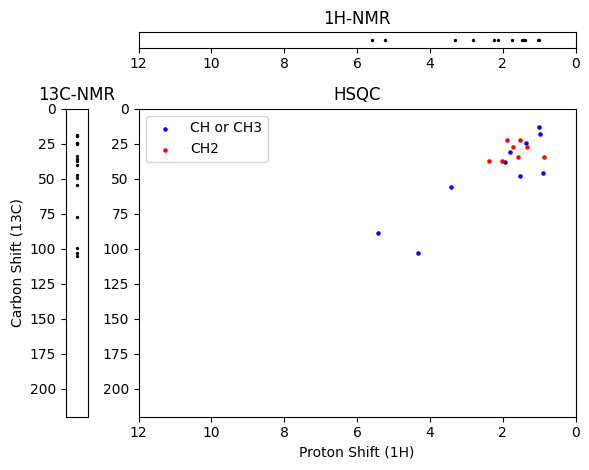

Ground truth chemical name Artemether (SM-224)
Ground truth SMILES COC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3


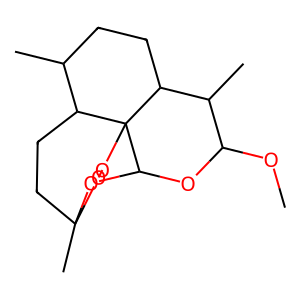

pred FP:         [[0], [2], [4], [5], [7], [14], [15], [18], [26], [37], [41], [49], [65], [106], [179], [329], [380], [411], [419], [560], [2297], [2755], [3072], [4127], [4431], [4643], [8796], [15585]]
________retival #1, cosine similarity to prediction: 0.984508752822876_________________
retrival is the same as ground truth: True
ground truth FP [[0], [2], [4], [5], [7], [14], [15], [18], [26], [37], [41], [49], [65], [106], [179], [329], [380], [411], [419], [560], [2297], [3072], [4127], [4431], [4643], [8796], [15585]]
retrived FP     [[0], [2], [4], [5], [7], [14], [15], [18], [26], [37], [41], [49], [65], [106], [179], [329], [380], [411], [419], [560], [2297], [3072], [4127], [4431], [4643], [8796], [15585]]
SMILES: COC1OC2OC3(C)CCC4C(C)CCC(C1C)C24OO3
Name Artemether
[0.01835644245147705, 0.05616044998168945, 0.01835644245147705, 0.01835644245147705, 0.01835644245147705, 0.01835644245147705, 0.01835644245147705, 0.01835644245147705, 0.01835644245147705, 0.01835644245147705, 0

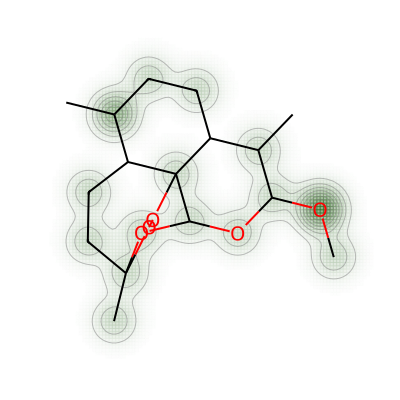

DONE






In [23]:
'''
show some examples from my dataset to check sanity
for a single model, show top-5
'''
from datasets.dataset_utils import  plot_NMR
from inference.inference_utils import show_retrieved_mol_with_highlighted_frags

# model.to("cuda")
# for  which_compound in  random.sample(range(len(loader_all_inputs.dataset)), k=1):# range(0, 1):  
for which_compound in [5]:    
    
    for idx, batch in enumerate(test_loader):
        if idx < which_compound:
            continue
        inputs, extra_info = batch
        (smiles, names, NMR_type_indicator, path, superclasses) = zip(*extra_info)
        # print(inputs.shape, inputs)
        # print(inputs, smiles_chemical_name)
        
        # batch[0] = batch[0].to("cuda")
        hsqc, c_tensor, h_tensor = unpack_inputs_no_delimiter(inputs[0], NMR_type_indicator[0])
  
        inputs = inputs.to(model.device)
        NMR_type_indicator = NMR_type_indicator[0].to(model.device)
        pred = model(inputs, NMR_type_indicator)
        pred=torch.sigmoid(pred) # sigmoid
        pred_FP = torch.where(pred.squeeze()>0.5, 1, 0)
        # print(pred_FP.nonzero().squeeze().tolist())
        break
    # print(f"dataloader: {loader_all_inputs.dataset.latest_element_got}")
    
    ground_truth_FP = fp_loader.build_mfp_for_new_SMILES(smiles[0])
    cos_ground_and_pred = compute_cos_sim(ground_truth_FP, pred.squeeze().float().to(ground_truth_FP.device))
    if cos_ground_and_pred < 1:
        print(f"############################################### compound number: {which_compound+1}##############################################################")
        print("Ground truth cosine similarity to prediction(floating point number after sigmoid): ", cos_ground_and_pred)
        # print(inputs)
        
        print("Ground Truth NMR and structure")
        plot_NMR(hsqc, c_tensor, h_tensor)
        

        # # ground truth
        mol = Chem.MolFromSmiles(smiles[0])
        # mol = Chem.AddHs(mol)
        print(f"Ground truth chemical name {names[0]}")
        print(f"Ground truth SMILES {smiles[0]}")
        # print(f"Ground truth NMR path {path[0]}")
        img = Draw.MolToImage(mol, size=(300, 300))
        img.show()
        
        print(f"pred FP:        ", pred_FP.nonzero().tolist())
        
        topk = retrieve_top_k_by_rankingset(rankingset_data, pred, smiles_and_names, k=1)
        i=0
        for value, (smile, name, _, _), retrieved_FP in topk:
            print(f"________retival #{i+1}, cosine similarity to prediction: {value.item()}_________________")
            print(f"retrival is the same as ground truth: {smile == smiles[0]}")
            print("ground truth FP", ground_truth_FP.nonzero().tolist())
            # print("retrived FP", retrieved_FP.nonzero().tolist())
            print("retrived FP    ", retrieved_FP.to_dense().squeeze().nonzero().tolist())
            mol = Chem.MolFromSmiles(smile)

            print(f"SMILES: {smile}") 
            print(f"Name {name}")
            # img = Draw.MolToImage(mol)
            # img.show()
            img = show_retrieved_mol_with_highlighted_frags(pred_FP, smile)
            img.show()
            i+=1
        
print("DONE\n\n\n\n")
        



In [24]:
"""
Start  unkown compound
"""

'\nStart  unkown compound\n'

In [25]:
# look for the higher cos_sim possible in our dataset
from inference.inference_utils import show_retrieved_mol_with_highlighted_frags
def retrieve_based_on_groudth(groud_truth_FP, k=5):
    topk = retrieve_top_k_by_rankingset(rankingset_data, groud_truth_FP, smiles_and_names, k=k) 
    
    i=0
    for ite, (value, (smile, name, _, _), retrieved_FP) in enumerate(topk):
        print(f"retival #{i+1}, cosine similarity between retrieval and ground truth: {value.item()}_____________________________")
        mol = Chem.MolFromSmiles(smile)
        print("retrived FP", retrieved_FP.to_dense().squeeze().tolist())
        print(f"SMILES: {smile}")
        print(f"Name {name}")
        #check is path file exists
        # plot_NMR(hsqc, c_tensor, h_tensor)
        # img = Draw.MolToImage(mol)
        img = show_retrieved_mol_with_highlighted_frags(groud_truth_FP[0], smile)
        img.show()
        
        # display(img)
        i+=1

In [26]:
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"
Kavaratamide_A_FP = fp_loader.build_mfp_for_new_SMILES(Kavaratamide_A_SMILES)


# Kavaratamide_A_bit_infos = count_circular_substructures(Kavaratamide_A_SMILES)

In [27]:
newCompoundA_SMILES = "O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O"
newCompoundA_FP = fp_loader.build_mfp_for_new_SMILES(newCompoundA_SMILES)

Kavaratamide_A


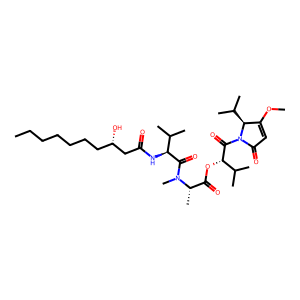

In [28]:
print("Kavaratamide_A")
mol = Chem.MolFromSmiles(Kavaratamide_A_SMILES)
img = Draw.MolToImage(mol)
img

retival #1, cosine similarity between retrieval and ground truth: 0.7378648519515991_____________________________
retrived FP [0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0,

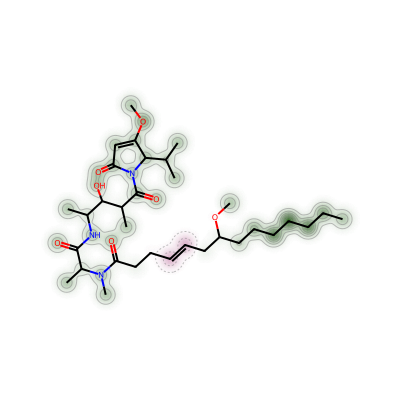

retival #2, cosine similarity between retrieval and ground truth: 0.6067880988121033_____________________________
retrived FP [0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.1714985966682434, 0.0, 0.0, 0.1714985966682434, 0.0, 0.1714985966682434, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

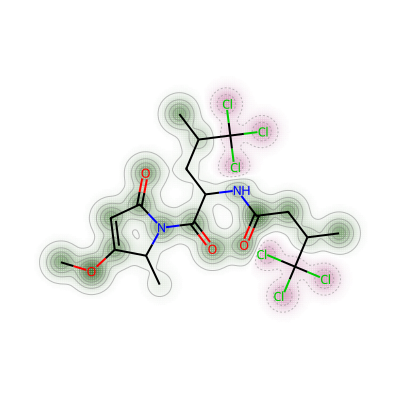

In [51]:
retrieve_based_on_groudth(Kavaratamide_A_FP.unsqueeze(dim=0).to("cuda"), k=2)




Kavaratamide A


_________________________________________________________
Prediction's cosine similarity to ground truth:  0.748132050037384



base similarity:  0.6564998626708984
base similarity:  0.07493486755176125
________retival #1, cosine similarity to prediction: 0.6564999222755432_________________
________retival's   cosine similarity to ground truth:  0.5249415636062622
SMILES: CCCCCCCC(O)CC(=O)NC(Cc1ccc(O)cc1)C(O)CC(=O)NC(C(=O)NC1C=CC(=O)NC(C(C)C)C(=O)N(C)C(Cc2ccc(O)cc2)C(=O)OC1)C(C)C
Name ['B1371A']


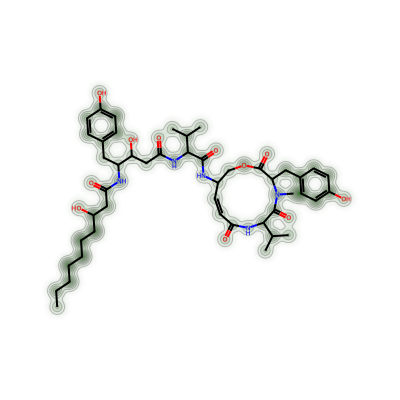

base similarity:  0.6383662819862366
base similarity:  0.060515364784490884
________retival #2, cosine similarity to prediction: 0.6383663415908813_________________
________retival's   cosine similarity to ground truth:  0.7378647923469543
SMILES: CCCCCCCC(CC=CCCC(=O)N(C)C(C)C(=O)NC(C)C(O)C(C)C(=O)N1C(=O)C=C(OC)C1C(C)C)OC
Name 934248-75-6


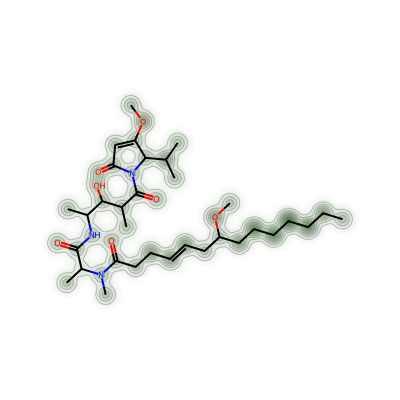

base similarity:  0.5897464156150818
base similarity:  0.05740991584648073
________retival #3, cosine similarity to prediction: 0.5897464752197266_________________
________retival's   cosine similarity to ground truth:  0.5555556416511536
SMILES: CCCCCCCC(O)CC(=O)NC(CO)C(=O)OC(CCCCCCC)CC(=O)OC(CCCCC)CC(=O)O
Name 3-[3-[3-hydroxy-2-(3-hydroxydecanoylamino)propanoyl]oxydecanoyloxy]octanoic acid


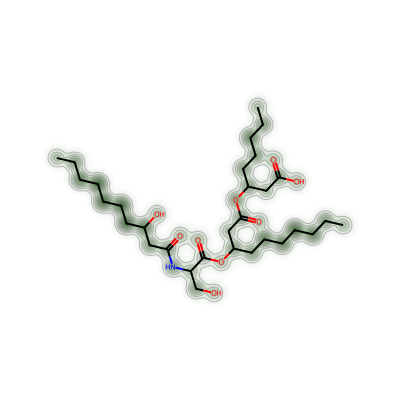

(['CCCCCCCC(O)CC(=O)NC(Cc1ccc(O)cc1)C(O)CC(=O)NC(C(=O)NC1C=CC(=O)NC(C(C)C)C(=O)N(C)C(Cc2ccc(O)cc2)C(=O)OC1)C(C)C',
  'CCCCCCCC(CC=CCCC(=O)N(C)C(C)C(=O)NC(C)C(O)C(C)C(=O)N1C(=O)C=C(OC)C1C(C)C)OC',
  'CCCCCCCC(O)CC(=O)NC(CO)C(=O)OC(CCCCCCC)CC(=O)OC(CCCCC)CC(=O)O'],
 [['B1371A'],
  '934248-75-6',
  '3-[3-[3-hydroxy-2-(3-hydroxydecanoylamino)propanoyl]oxydecanoyloxy]octanoic acid'])

In [50]:
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/Kavaratamide A"
mode = None#"flip_sign"
inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=True,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=Kavaratamide_A_FP,
                   fp_type = "DB_Specific_Radius", filter_by_MW="from_input",
                #    weight_pred = torch.tensor(-fp_loader.total_entropy_of_all_bits).to("cuda").float()
                )
                   

In [ ]:
def investigate_new_molecule(compound_dir, SMILES):
    return
    mode = None#"flip_sign"

    # for model_type in ["only_1d_DTD", "only_C-NMR_DTD"]:
    for model_type in ['All-NMR', 'HSQC', 'C-NMR', 'H-NMR', 'HSQC_C-NMR', 'HSQC_H-NMR', 'only_1d', "only_1d_DTD", "only_C-NMR_DTD"]:
    # for model_type in ['All-NMR']:
    # for model_type in ['C-NMR', ]:
        
        kwargs = {
            "include_h_nmr" : model_type in ['All-NMR', 'H-NMR', 'HSQC_H-NMR', 'only_1d', "only_1d_DTD"],
            "include_c_nmr" : model_type in ['All-NMR', 'C-NMR', 'HSQC_C-NMR', 'only_1d', "only_1d_DTD", "only_C-NMR_DTD"],
            "include_hsqc" : model_type in ['All-NMR', 'HSQC', 'HSQC_C-NMR', 'HSQC_H-NMR', ]
        }
        
        inputs, NMR_type_indicator = build_input(compound_dir, mode=mode, **kwargs)
        
        hparams, model, test_loader = choose_model_DB_specific_FP(model_type)
        max_radius = fp_loader.max_radius
        print(f"Model type: {model_type}, max_radius: {max_radius}")
        rankingset_path = f"/root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/max_radius_{max_radius}_stacked_together_sparse/FP.pt"
        rankingset_data = torch.load(rankingset_path)#.to("cuda")
        
        save_molecule_inference(SMILES, compound_dir.split("/")[-1], None, model, model_type, inputs, NMR_type_indicator, rankingset_data, smiles_and_names)

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/Kavaratamide A"
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"

investigate_new_molecule(compound_dir, Kavaratamide_A_SMILES)

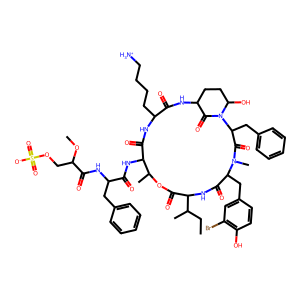

Error in O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O
Expecting value: line 1 column 1 (char 0)


(['unknown'], None)

In [36]:
# retrieve_based_on_groudth(newCompoundA_FP.unsqueeze(dim=0).to("cuda"), k=5)
newCompoundA_SMILES = "O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O"
Draw.MolToImage(Chem.MolFromSmiles(newCompoundA_SMILES)).show()
get_superclass_and_glycoside(newCompoundA_SMILES)

In [37]:
newCompoundA_FP = fp_loader.build_mfp_for_new_SMILES(newCompoundA_SMILES)

retival #1, cosine similarity between retrieval and ground truth: 0.8002593517303467_____________________________
retrived FP [0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.0, 0.0, 0.08638684451580048, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.086386844515800

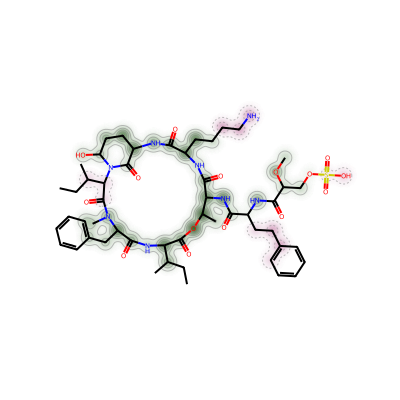

retival #2, cosine similarity between retrieval and ground truth: 0.7915244102478027_____________________________
retrived FP [0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.0, 0.0, 0.08391813933849335, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

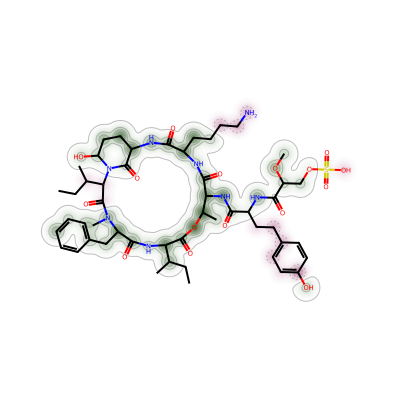

In [42]:
retrieve_based_on_groudth(newCompoundA_FP.unsqueeze(dim=0).to("cuda"), k=2)




new_compound_A


_________________________________________________________
Prediction's cosine similarity to ground truth:  0.703415036201477



[0.005829334259033203, 0.008595943450927734, 0.010008633136749268, 0.0, 0.012220382690429688, 0.005740344524383545, 0.007485568523406982, 0.0, 0.010807693004608154, 0.013332247734069824, 0.0077904462814331055, 0.005824923515319824, 0.005799710750579834, 0.011689484119415283, 0.0, 0.0, 0.00766909122467041, 0.0053214430809021, 0.004993915557861328, 0.0, 0.0, -0.00328141450881958, 0.0, 0.0, 0.0, 0.005795717239379883, 0.0007410049438476562, 0.0, 0.007558763027191162, 0.002252340316772461, 0.000955045223236084, 0.00817340612411499, 0.00024443864822387695, 0.006225705146789551, 0.0030043721199035645, 0.0, 0.008386373519897461, 0.002385735511779785, 0.0, 0.0, 0.0, 0.005635976791381836, 0.01168215274810791, 0.0, 0.016984939575195312, 0.010151386260986328, -0.0009384751319885254, 0.0, 0.0009455680847167969, -0.006693840026855469, -0.0076267123222351

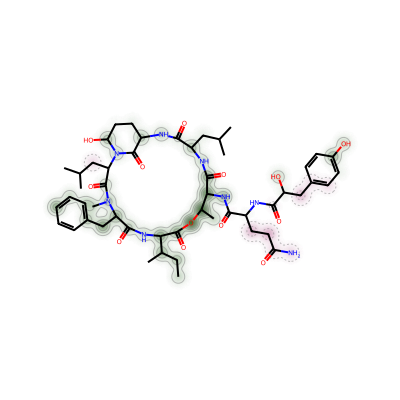

[0.005949676036834717, 0.008725106716156006, 0.010095953941345215, 0.004895687103271484, 0.012389719486236572, 0.005857408046722412, 0.0075737833976745605, 0.0, 0.011018216609954834, 0.0015829801559448242, 0.000988602638244629, -0.001026749610900879, 0.0018391013145446777, 0.00956958532333374, 0.005864620208740234, 0.0, 0.0, 0.007764101028442383, 0.005423188209533691, 0.005083680152893066, 0.0, 0.005817890167236328, 0.005701601505279541, 0.005142092704772949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005821704864501953, 0.0006754398345947266, 0.0, 0.007555067539215088, 0.0020516514778137207, 0.0008027553558349609, 0.008192479610443115, 0.0001608133316040039, 0.006267547607421875, 0.0030214786529541016, 0.0, -0.0008779168128967285, -0.009456336498260498, -0.0038637518882751465, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0057492852210998535, 0.011924922466278076, 0.0, 0.017331182956695557, 0.01782512664794922, 0.008938372135162354, 0.005882859230041504, 0.0024884939193725586, 0.005300581455230713, -0.00349354743957519

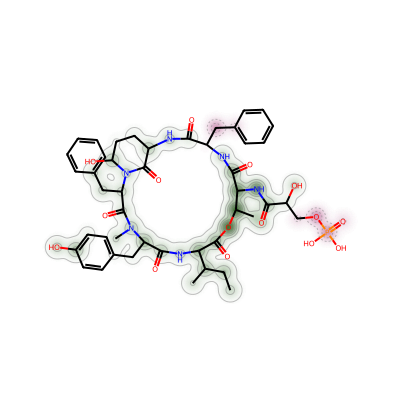

[0.00587773323059082, 0.008716702461242676, 0.010213315486907959, 0.0, 0.012407898902893066, 0.005789399147033691, 0.00761491060256958, 0.0, 0.010911524295806885, 0.013511121273040771, 0.008012235164642334, 0.005873322486877441, 0.005848288536071777, 0.01178652048110962, 0.0, 0.0, 0.0077970027923583984, 0.005373656749725342, 0.005048632621765137, 0.0, 0.0, 0.0007659196853637695, 0.0054975152015686035, 0.0, 0.0, 0.0059378743171691895, 0.0008280277252197266, 0.0, 0.007782280445098877, 0.00251692533493042, 0.0011343955993652344, 0.00839221477508545, 0.0, 0.006364583969116211, 0.0030742287635803223, 0.0, 0.005818009376525879, 0.0024475455284118652, -0.0030252933502197266, -0.0031701326370239258, -0.0031772851943969727, -0.003162682056427002, 0.0, 0.0, 0.0, 0.005685865879058838, 0.011779308319091797, 0.0, 0.017135798931121826, 0.010354995727539062, -0.0008386373519897461, 0.0, 0.0011249780654907227, -0.006360232830047607, -0.007286012172698975, -0.0034412145614624023, -0.0034071803092956543

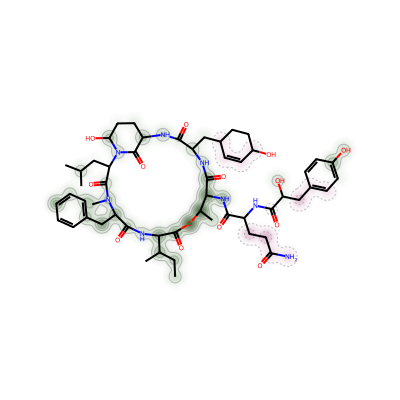

(['CCC(C)C1NC(=O)C(Cc2ccccc2)N(C)C(=O)C(CC(C)C)N2C(=O)C(CCC2O)NC(=O)C(CC(C)C)NC(=O)C(NC(=O)C(CCC(N)=O)NC(=O)C(O)Cc2ccc(O)cc2)C(C)OC1=O',
  'CCC(C)C1NC(=O)C(Cc2ccc(O)cc2)N(C)C(=O)C(Cc2ccccc2)N2C(=O)C(CCC2O)NC(=O)C(Cc2ccccc2)NC(=O)C(NC(=O)C(O)COP(=O)(O)O)C(C)OC1=O',
  'CCC(C)C1NC(=O)C(Cc2ccccc2)N(C)C(=O)C(CC(C)C)N2C(=O)C(CCC2O)NC(=O)C(CC2C=CC(O)CC2)NC(=O)C(NC(=O)C(CCC(N)=O)NC(=O)C(O)Cc2ccc(O)cc2)C(C)OC1=O'],
 ['49766272',
  '"[(2~{S})-3-[[(2~{S},5~{S},8~{S},11~{R},12~{S},15~{S},18~{R},21~{R})-2,15-dibenzyl-21-hydroxy-5-[(4-hydroxyphenyl)methyl]-4,11-dimethyl-8-[(1~{S})-1-methylpropyl]-3,6,9,13,16,22-hexaoxo-10-oxa-1,4,7,14,17-pentazabicyclo[16.3.1]docosan-12-yl]amino]-2-hydroxy-3-oxo-propyl] dihydrogen phosphate"',
  '102041486'])

In [39]:
mode = None#"flip_sign"
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/new_compound_A"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=False,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=newCompoundA_FP, filter_by_MW="from_input",
                   fp_type = "DB_Specific_Radius")

In [40]:
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/new_compound_A"
investigate_new_molecule(compound_dir, newCompoundA_SMILES)




NameError: name 'investigate_new_molecule' is not defined

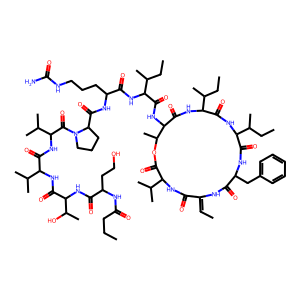

(['Oligopeptides'], False)

In [ ]:
new_compoundB_smiles = "CCC(C1C(NC(C(C)CC)C(NC(CC2=CC=CC=C2)C(N/C(C(NC(C(C)C)C(OC(C)C(NC(C(NC(C(NC(C3CCCN3C(C(NC(C(NC(C(NC(C(NC(CCC)=O)CCO)=O)C(O)C)=O)C(C)C)=O)C(C)C)=O)=O)CCCNC(N)=O)=O)C(CC)C)=O)C(N1)=O)=O)=O)=C\C)=O)=O)=O)C"
Draw.MolToImage(Chem.MolFromSmiles(new_compoundB_smiles)).show()
get_superclass_and_glycoside(new_compoundB_smiles)

retival #1, cosine similarity between retrieval and ground truth: 0.9006819128990173_____________________________
retrived FP [0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356

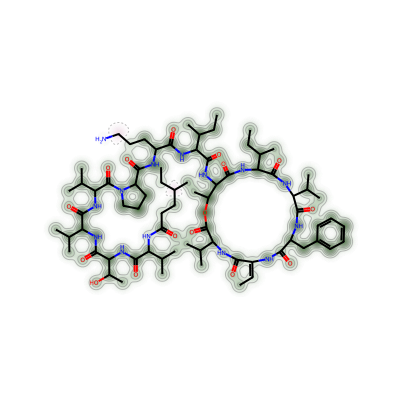

In [ ]:
newCompoundB_FP = fp_loader.build_mfp_for_new_SMILES(new_compoundB_smiles)
retrieve_based_on_groudth(newCompoundB_FP.unsqueeze(dim=0).to("cuda"), k=1)




new_compound_B1


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.7403514385)



________retival #1, cosine similarity to prediction: 0.8280038237571716_________________
________retival's   cosine similarity to ground truth:  0.9006820321083069
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name "(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methylhexanoyl]amino]butanoyl]amino]butanoyl]amino]-3-methyl-butanoyl]amino]-3-methyl-butanoyl]pyrrol

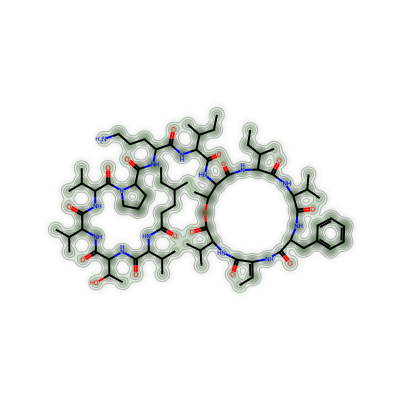

________retival #2, cosine similarity to prediction: 0.8237215280532837_________________
________retival's   cosine similarity to ground truth:  0.8976945877075195
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name 9898671


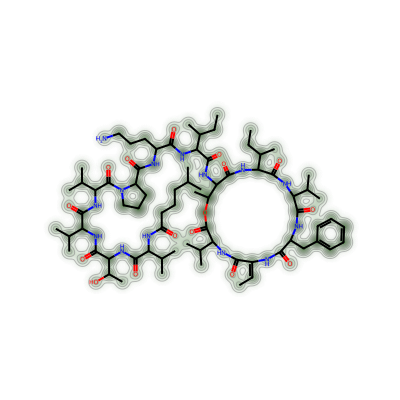

(['CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O',
  'CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O'],
 ['"(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methylhexanoyl]amino]butanoyl]amino]butanoyl]amino]-3-methyl-butanoyl]amino]-3-methyl-butanoyl]pyrrolidine-2-carboxamide"',
  '9898671'])

In [ ]:
mode = None#"flip_sign"
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/new_compound_B1"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=False, include_hsqc=True,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=2, mode = None, ground_truth_FP=newCompoundB_FP, filter_by_MW="from_input",
                   fp_type = "DB_Specific_Radius")




new_compound_B2


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.8439829350)



________retival #1, cosine similarity to prediction: 0.9218865633010864_________________
________retival's   cosine similarity to ground truth:  0.8976945877075195
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name 9898671


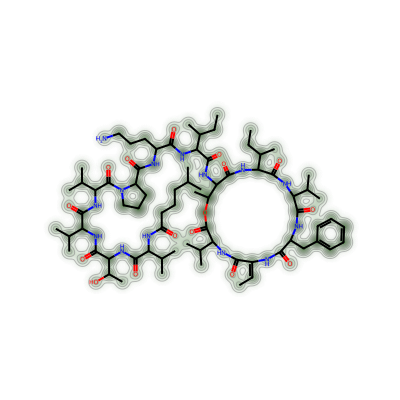

________retival #2, cosine similarity to prediction: 0.9206019043922424_________________
________retival's   cosine similarity to ground truth:  0.9006820321083069
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name "(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methylhexanoyl]amino]butanoyl]amino]butanoyl]amino]-3-methyl-butanoyl]amino]-3-methyl-butanoyl]pyrrolidine-2-carboxamide"


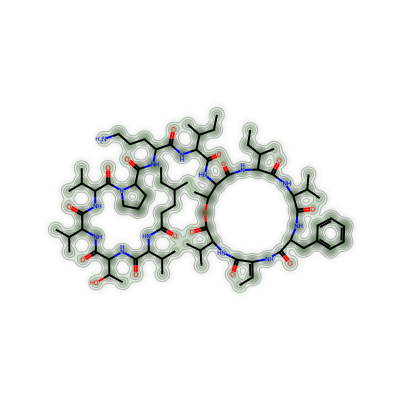

________retival #3, cosine similarity to prediction: 0.9089216589927673_________________
________retival's   cosine similarity to ground truth:  0.8860357403755188
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)(C)O)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name 5-OHKF


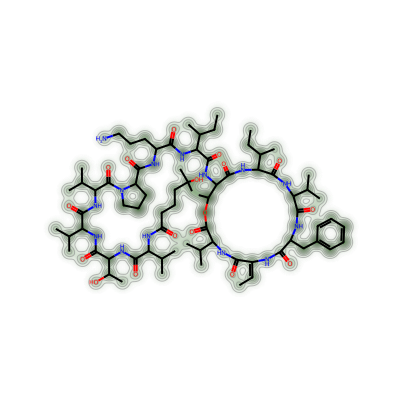

(['CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O',
  'CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O',
  'CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)(C)O)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O'],
 ['9898671',
  '"(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methy

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/new_compound_B2"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=False, include_hsqc=True,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=newCompoundB_FP, filter_by_MW="from_input",
                   fp_type = "DB_Specific_Radius")

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/new_compound_B1"
# inputs, NMR_type_indicator = build_input(compound_dir,
#                      mode=mode,
#                      include_h_nmr=False, include_c_nmr=False
#                      )
# show_topK(inputs, k=3)

investigate_new_molecule(compound_dir, None)

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre/datasets/testing_compounds/new_compound_B2"


investigate_new_molecule(compound_dir, None)